# Simulation experiment: nonlinear signal detection

**Question**: Can VAE detect nonlinear signal in simulated data?

**Hypothesis**: If we generate a gene expression dataset with a strong signal, step function, a nonlinear compression method (VAE) will be able to learn this signal and predict new gene expression patterns better compared to using a linear comparession method (PCA) and using no compression method (all the genes)
 
**Study design**:
1. Input: Add step function to to Pa gene expression dataset:
2. Approach: Train nonlinear (VAE) and linear (PCA) compression algorithms using this simulated data
3. Evaluation: For each sample in the Pa dataset compare spearman corr(predicted expression, actual expression).  So each sample will have a correlation score and then the entire dataset will have a distribution of correlation scores from one simulation.
4. Output: Boxplot of the correlation scores per simulation run 

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import random

from functions import vae, pca, simulate_step_function, encode_decode

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/Pa_interpolate_simple/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Simulated data

The step function is defined based on the following algorithm:

```python
for sample in compendium:
    expression(gene_in_set_A) = random(0,1)
    if expression(gene_in_set_A) > threshold_A:
        expression(gene_in_set_B) = expression(gene_in_set_B)*(1+percentage) 
```
Note: This algorithm is applied to each sample in the compendium 
      (essentially adding a signal to the existing gene expression data in the compendium)
      
Overall, genes in set B are upregulated if the activity of genes in set A are above some threshold

In [2]:
# Parameters for simulated data

geneSetA_size = 1000                           # Size of the gene set A
geneSetB_size = 1000                           # Size of the gene set that will be regulated by gene A 
effect_size = 0.5                             # Percentage to upregulate each gene in set B
thresholdA = 0.5                              # Threshold for activation of gene A 
analysis_name = 'test_multiple_runs'  # Name of analysis
seeds = [1,2,3]                                   # Random seed

# Parameters to train nonlinear (VAE) compression method
learning_rate = 0.001
batch_size = 100
epochs = 100
kappa = 0.01
intermediate_dim = 100
latent_dim = 2
epsilon_std = 1.0
num_PCs = latent_dim

base_dir = os.path.dirname(os.getcwd())

## Multiple runs

For each random seed we do the following:
1. Generate multiple simulation datasets
2. Train VAE and PCA models based on these datasets
3. Predict gene expression profiles using these models (encoding and decoding the data, NO interpolation step here)

**Prediction step**
Question:  How do genes in set B are changing with respect to genes in set A after shifting input expression and then applying our latent space transformation?

In order to test this we manually shift A genes from being below the activation threshold to being above it and see how the gene expression data is reconstructed


Generating simulated data and training models for seed 1
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/data/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/encoded/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/models/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/output/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/stats/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/viz/test_multiple_runs
Confirmed that all gene ids are available
After removing 1000 gene ids for set A, there are 4549 gene ids remaining.
After removing 1000 gene ids for set B, there are 3549 gene ids remaining.


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/vae.py:494: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 1s 859us/step - loss: 1379.3015 - val_loss: 1354.5206
Epoch 2/100
855/855 [==============================] - 0s 213us/step - loss: 1356.3559 - val_loss: 1332.1531
Epoch 3/100
855/855 [==============================] - 0s 211us/step - loss: 1336.3459 - val_loss: 1314.7930
Epoch 4/100
855/855 [==============================] - 0s 210us/step - loss: 1323.0925 - val_loss: 1366.4973
Epoch 5/100
855/855 [==============================] - 0s 210us/step - loss: 1303.4155 - val_loss: 1311.8409
Epoch 6/100
855/855 [==============================] - 0s 224us/step - loss: 1296.4793 - val_loss: 1282.3671
Epoch 7/100
855/855 [==============================] - 0s 212us/step - loss: 1280.5334 - val_loss: 1326.2848
Epoch 8/100
855/855 [==============================] - 0s 212us/step - loss: 1281.0792 - val_loss: 1421.9124
Epoch 9/100
855/855 [==============================] - 0s 216us/step - loss: 1270.9

/home/alexandra/anaconda3/envs/Pa_interpolate_simple/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Generating simulated data and training models for seed 2
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/data/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/encoded/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/models/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/output/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/stats/test_multiple_runs
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/viz/test_multiple_runs
Confirmed that all gene ids are available
After removing 1000 gene ids for set A, there are 4549 gene ids remaining.
After removing 1000 gene ids for set B, there are 3549 gene ids remaining.


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/vae.py:494: UserWarning: Output "custom_variational_layer_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_2" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 1s 957us/step - loss: 1380.1691 - val_loss: 1377.1606
Epoch 2/100
855/855 [==============================] - 0s 211us/step - loss: 1360.7517 - val_loss: 1357.3821
Epoch 3/100
855/855 [==============================] - 0s 215us/step - loss: 1340.8028 - val_loss: 1331.9006
Epoch 4/100
855/855 [==============================] - 0s 213us/step - loss: 1325.0153 - val_loss: 1317.7056
Epoch 5/100
855/855 [==============================] - 0s 212us/step - loss: 1315.9369 - val_loss: 1329.1899
Epoch 6/100
855/855 [==============================] - 0s 215us/step - loss: 1310.6275 - val_loss: 1301.8754
Epoch 7/100
855/855 [==============================] - 0s 212us/step - loss: 1298.3837 - val_loss: 1316.7054
Epoch 8/100
855/855 [==============================] - 0s 212us/step - loss: 1300.3948 - val_loss: 1323.9841
Epoch 9/100
855/855 [==============================] - 0s 217us/step - loss: 1300.4

/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/vae.py:494: UserWarning: Output "custom_variational_layer_3" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_3" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 1s 1ms/step - loss: 1378.6169 - val_loss: 1350.0240
Epoch 2/100
855/855 [==============================] - 0s 215us/step - loss: 1357.0239 - val_loss: 1362.1951
Epoch 3/100
855/855 [==============================] - 0s 213us/step - loss: 1338.9538 - val_loss: 1372.2179
Epoch 4/100
855/855 [==============================] - 0s 213us/step - loss: 1319.5337 - val_loss: 1348.4261
Epoch 5/100
855/855 [==============================] - 0s 214us/step - loss: 1311.5992 - val_loss: 1329.1814
Epoch 6/100
855/855 [==============================] - 0s 227us/step - loss: 1303.5326 - val_loss: 1289.7048
Epoch 7/100
855/855 [==============================] - 0s 215us/step - loss: 1297.8649 - val_loss: 1286.2418
Epoch 8/100
855/855 [==============================] - 0s 214us/step - loss: 1297.5233 - val_loss: 1256.3728
Epoch 9/100
855/855 [==============================] - 0s 213us/step - loss: 1291.487

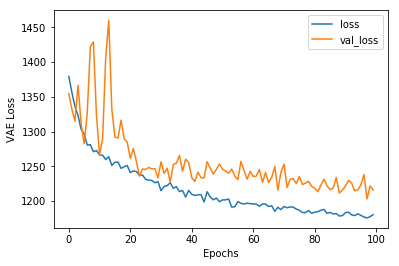

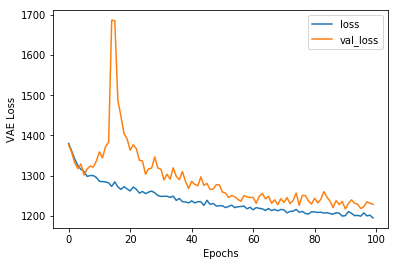

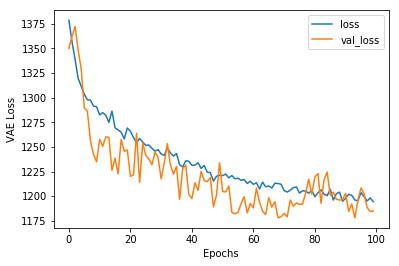

In [3]:
for i in seeds:
    print('Generating simulated data and training models for seed {}'.format(i))
    # Generate simulated data
    simulate_step_function.simulate_data(geneSetA_size,
                                         geneSetB_size,
                                         effect_size,
                                         thresholdA,
                                         analysis_name,
                                         i)
    
    # Train nonlinear (VAE)
    vae.tybalt_2layer_model_multi(learning_rate, 
                            batch_size, 
                            epochs, 
                            kappa, 
                            intermediate_dim,
                            latent_dim, 
                            epsilon_std, 
                            base_dir, 
                            analysis_name, 
                            i)
    
    # Train linear (PCA)
    pca.pca_model_multi(base_dir, 
                  analysis_name, 
                  num_PCs,
                  i)
    
    # Predict gene expression profile
    # Read in data
    A_file = os.path.join(
        base_dir,
        "data",
        analysis_name,
        "geneSetA_seed"+str(i)+".txt"
    )
    sim_data_file = os.path.join(
        os.path.dirname(os.getcwd()),
        "data",
        analysis_name,
        "train_model_input_seed"+str(i)+".txt.xz")

    model_encoder_file = os.path.join(
        base_dir,
        "models",
        analysis_name,
        "tybalt_2layer_latent_encoder_model_seed"+str(i)+".h5")

    weights_encoder_file = os.path.join(
        base_dir,
        "models",
        analysis_name,
        "tybalt_2layer_latent_encoder_weights_seed"+str(i)+".h5")

    model_decoder_file = os.path.join(
        base_dir,
        "models",
        analysis_name, 
        "tybalt_2layer_latent_decoder_model_seed"+str(i)+".h5")


    weights_decoder_file = os.path.join(
        base_dir,
        "models", 
        analysis_name, 
        "tybalt_2layer_latent_decoder_weights_seed"+str(i)+".h5")

    # Load data
    geneSetA = pd.read_table(A_file, header=0, index_col=0)
    sim_data = pd.read_table(sim_data_file, header=0, sep='\t', index_col=0)

    # Select samples that have expression of gene A around the threshold 
    # Since threshold is 0.5 then select samples with expression in range(0.4, 0.6)

    # Since our simulation set all genes in set A to be the same value for a give sample
    # we can consider a single gene in set A to query by
    rep_gene_A = geneSetA.iloc[0][0]

    # Query for samples whose representative gene A expression is in range (0.4, 0.6)
    #test_samples = sim_data.query('0.4 < @rep_gene_A < 0.6') -- why didn't this work?
    test_samples = sim_data[(sim_data[rep_gene_A]>0.4) & (sim_data[rep_gene_A]<0.6)]

    test_samples_sorted = test_samples.sort_values(by=[rep_gene_A])
    # Get single sample
    test_sample = test_samples_sorted.index[0]
    print(test_sample)

    # Sample with original value of gene A
    A_exp_sample = test_samples_sorted.loc[test_sample]

    A_exp_sample_modified_df = pd.DataFrame()

    A_exp_sample_modified_df.append(A_exp_sample, ignore_index=True)

    # Convert dataframe with gene ids to list
    geneSetA_ls = geneSetA['gene id'].values.tolist()

    # Artificially shift genes in set A
    new_A_exp = np.linspace(0.41, 0.60, num=100)

    for j in new_A_exp:
        test_samples_sorted.loc[test_sample,geneSetA_ls] = j
        A_exp_sample = test_samples_sorted.loc[test_sample]
        A_exp_sample_modified_df = A_exp_sample_modified_df.append(A_exp_sample, ignore_index=True)

    #A_exp_sample_modified_df.head()

    # Predict 
    out_dir = os.path.join(base_dir, "output", analysis_name)
    encoded_dir = os.path.join(base_dir, "encoded", analysis_name)
    model_dir = os.path.join(base_dir, "models", analysis_name)

    encode_decode.vae_encode_decode_shiftA(A_exp_sample_modified_df,
                                           model_encoder_file,
                                           model_decoder_file,
                                           weights_encoder_file,
                                           weights_decoder_file,
                                           encoded_dir,
                                           rep_gene_A,
                                           out_dir,
                                           i)

    encode_decode.pca_encode_decode_shiftA(A_exp_sample_modified_df,
                                           model_dir,
                                           encoded_dir,
                                           rep_gene_A,
                                           out_dir,
                                           i)
    